In [16]:
import kagglehub
import pandas as pd
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Input, Dense, Dropout
from tensorflow.keras.optimizers import Adam
!pip install keras-tuner --quiet
import keras_tuner as kt

import matplotlib.pyplot as plt

In [17]:
path = kagglehub.dataset_download("bobbyscience/league-of-legends-diamond-ranked-games-10-min")
csv_file_path = os.path.join(path, "high_diamond_ranked_10min.csv")
original_df = pd.read_csv(csv_file_path)

original_df

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9874,4527873286,1,17,2,1,7,4,5,1,1,...,0,15246,6.8,16498,229,34,-2519,-2469,22.9,1524.6
9875,4527797466,1,54,0,0,6,4,8,1,1,...,0,15456,7.0,18367,206,56,-782,-888,20.6,1545.6
9876,4527713716,0,23,1,0,6,7,5,0,0,...,0,18319,7.4,19909,261,60,2416,1877,26.1,1831.9
9877,4527628313,0,14,4,1,2,3,3,1,1,...,0,15298,7.2,18314,247,40,839,1085,24.7,1529.8


In [18]:
clean_df = original_df.dropna().reset_index(drop=True)
target = clean_df["blueWins"]

instances = clean_df.drop(columns=["gameId", "blueWins"])
instances

,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,28,2,1,9,6,11,0,0,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,12,1,0,5,5,5,0,0,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,15,0,0,7,11,4,1,1,0,0,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,43,1,0,4,5,5,1,0,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,75,4,0,6,6,6,0,0,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9874,17,2,1,7,4,5,1,1,0,0,...,0,15246,6.8,16498,229,34,-2519,-2469,22.9,1524.6
9875,54,0,0,6,4,8,1,1,0,0,...,0,15456,7.0,18367,206,56,-782,-888,20.6,1545.6
9876,23,1,0,6,7,5,0,0,0,0,...,0,18319,7.4,19909,261,60,2416,1877,26.1,1831.9
9877,14,4,1,2,3,3,1,1,0,0,...,0,15298,7.2,18314,247,40,839,1085,24.7,1529.8


In [19]:
instances.dtypes

,0
blueWardsPlaced,int64
blueWardsDestroyed,int64
blueFirstBlood,int64
blueKills,int64
blueDeaths,int64
blueAssists,int64
blueEliteMonsters,int64
blueDragons,int64
blueHeralds,int64
blueTowersDestroyed,int64


# Principal Component Analysis (PCA)

In [20]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(instances)
scaled_data

pca = PCA().fit(scaled_data)
pca_components_number = 17

pca = PCA(n_components=pca_components_number).fit(scaled_data)
pca_data = pca.transform(scaled_data)
pca_data

array([[ 0.75277673,  2.39391919, -0.11472629, ...,  1.31047348,
         0.26139174, -0.3697135 ],
       [-4.11311068, -0.23267497,  1.84127892, ...,  1.39685688,
        -0.28176573, -0.13944349],
       [-2.17667861,  3.25161867, -2.48529134, ..., -0.09799878,
        -0.56154093,  0.34576235],
       ...,
       [-3.94282419, -0.27651717,  1.09761081, ..., -0.76469474,
        -0.74802371,  0.45087671],
       [-1.02435297, -3.63177389, -2.61130088, ...,  0.25930975,
        -0.8149067 ,  0.03028693],
       [ 0.57377455,  0.00446353,  1.49803372, ...,  0.27192971,
        -0.29988437, -0.28646482]])

In [21]:
# Creazione di un DataFrame con le componenti principali e il target
pca_df = pd.DataFrame(pca_data, columns=[f"PC{i+1}" for i in range(17)])
pca_df["blueWins"] = target

instances_pca = pca_df.drop('blueWins', axis=1)

instances_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17
0,0.752777,2.393919,-0.114726,-1.820820,-1.669618,-0.474753,-1.219832,-0.434775,0.745907,0.592353,1.140638,-0.482327,-0.011572,-0.394581,1.310473,0.261392,-0.369714
1,-4.113111,-0.232675,1.841279,-2.090242,-0.464073,-2.498079,4.538072,-0.370264,-0.592516,-0.484780,-0.653550,-1.027311,1.119493,1.513550,1.396857,-0.281766,-0.139443
2,-2.176679,3.251619,-2.485291,-2.136325,1.813148,-0.145678,-0.239827,0.366458,-0.619523,-1.017622,0.060988,-0.591669,-0.578439,-1.137855,-0.097999,-0.561541,0.345762
3,-1.251326,-0.988898,-1.714263,-0.111806,1.623818,0.564291,0.537196,-1.968502,-0.294990,-0.593529,0.548182,0.189813,0.397037,0.368790,-0.292478,-1.063897,-1.028401
4,-1.198084,-0.298521,1.631960,0.906831,0.977694,-0.562030,-0.184612,-1.474498,0.353115,0.295623,1.971910,1.605415,1.110684,1.154949,-0.838476,0.310722,0.796979
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9874,3.552857,-0.554755,-1.643110,0.156952,-0.096500,-0.754986,-0.108101,-0.168457,0.118285,-2.400264,-1.358970,1.064876,0.314016,-1.139347,0.269722,-0.153335,0.503953
9875,1.529951,-1.552413,-1.198992,0.953584,1.662560,-0.689933,-0.769553,0.032391,3.700254,0.116185,5.164189,-0.087167,-1.881456,-3.010107,5.107752,0.901070,-0.521412
9876,-3.942824,-0.276517,1.097611,2.252235,0.148167,-0.899292,-0.415435,-1.668158,-1.287539,0.601583,-0.253368,-0.619887,0.587944,0.042261,-0.764695,-0.748024,0.450877
9877,-1.024353,-3.631774,-2.611301,-0.883666,-1.441635,-0.363956,-0.658284,0.728841,1.552108,-0.010925,-1.710964,0.457134,0.623234,-1.159560,0.259310,-0.814907,0.030287


# Reti Neurali (NNs)

Per prima cosa suddividiamo il dataset ottenuto dalla PCA in:
- **Training set** (70%): dati utilizzati per l'addestramento del modello  
- **Validation set** (20%): dati utilizzati per l'ottimizzazione degli iperparametri
- **Test set** (10%): dati utilizzati per la valutazione delle prestazioni


In [22]:
instances_train, instances_temp, target_train, target_temp = train_test_split(instances_pca, target, test_size=0.3, random_state=42, stratify=target) # stratify per mantenere la proporzione 0/1 tra training e test set
instances_validation, instances_test, target_validation, target_test = train_test_split(instances_temp, target_temp, test_size=0.5, random_state=42, stratify=target_temp)

In [23]:
instances_train

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17
6314,1.957843,-5.012352,-1.999690,0.898519,-0.632602,-0.857612,0.055545,-0.482969,-0.556522,-2.041584,-0.276250,0.578120,0.210335,-0.271594,-0.041417,1.158978,0.676404
4288,-3.224483,2.155472,1.322549,1.776953,0.406702,-0.708199,-0.361548,-1.464102,-1.617322,0.444626,-0.709050,-0.939733,0.239204,-0.343533,-0.440566,-0.816318,0.407673
9637,-6.242451,7.008020,0.358054,-0.199393,-2.143766,1.281408,-1.151011,-0.226835,-0.707722,-0.175215,-0.166041,0.242974,-0.624011,0.004169,-0.224581,0.473311,-0.332236
7001,2.217289,1.558301,-2.695087,0.393841,-1.332305,2.505920,2.144662,-0.737698,-0.701359,1.716650,-1.122559,-0.166764,1.800058,-1.945102,-0.835816,0.178573,-0.537267
7716,5.206592,-0.953990,-1.462919,3.094818,-0.331750,1.739543,0.236027,0.793724,0.677369,1.044679,0.168156,1.319628,-0.373078,1.609119,-0.131406,-0.130799,0.461577
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1959,3.461619,2.039192,0.738460,-0.834286,1.641966,-1.823554,-0.689773,-0.851245,0.032624,0.643902,-0.859233,1.352373,0.767813,0.024903,0.810820,-0.229529,-1.047091
5545,2.986743,2.617625,0.157341,-1.908456,-0.188283,0.162627,-1.143069,0.259099,-0.690630,-1.974015,-0.489105,0.421879,0.416099,-0.478978,0.377389,0.103496,0.026012
8402,-1.280395,-2.413130,1.103449,-0.360345,-1.906323,0.244117,-1.039988,-0.162644,2.191466,0.303396,-0.946632,-0.443914,0.168720,-0.295115,0.008762,0.065782,0.434106
3130,-2.076576,-3.939446,-0.506661,-1.398378,0.898806,-0.729236,-1.159236,0.163823,-1.260903,0.781547,-0.225943,-1.587983,1.138506,0.076914,-0.459336,-1.090952,-1.088817


In [24]:
instances_validation

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17
5382,1.171032,1.355139,2.180698,-1.709292,-1.196894,1.405993,-1.133278,0.875015,-1.049292,0.573144,1.065189,-0.602297,-0.575139,0.158567,0.940596,-0.409284,-0.029419
5454,-5.524365,-4.997924,0.627812,0.885650,-0.452306,-0.057307,-0.528776,-0.779284,-0.642884,1.861097,-0.583857,0.127938,0.779641,-0.470213,0.145817,-0.120303,0.247011
6565,-3.334381,-2.894953,2.270988,-1.701500,0.694505,0.026206,1.277137,1.103893,1.016258,-0.132854,0.890427,0.058218,-1.620864,-1.163621,0.317898,0.511300,-0.349337
4743,-0.777700,-0.346283,-1.902130,1.701595,1.168091,-1.464873,0.318930,-0.821444,-1.228984,0.096487,-0.347746,0.634772,0.111273,-0.198652,0.305775,0.774805,0.469486
2204,-1.496435,-0.953697,1.470319,1.977691,-2.099297,0.071421,-0.880890,-0.917531,-1.141658,0.162756,0.116982,-0.431283,0.157917,-0.033096,0.176851,-0.144959,-0.214248
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5653,3.079210,1.024540,-0.980326,-1.174565,1.436629,-1.178444,-0.022344,0.277622,-0.511204,1.511454,-0.005396,0.061555,-0.488554,0.226040,0.359889,0.123846,0.252494
838,-1.817693,0.886145,-2.388012,-0.891230,0.656260,-1.450879,-0.095057,-0.323354,-0.076034,0.944732,-0.393591,-0.850865,-0.305820,-0.331697,-0.547988,-0.318946,-0.028334
634,3.008823,-1.136647,-2.317842,2.739615,-1.770600,0.303869,0.999524,-1.120702,-0.658463,1.610892,-0.213570,-0.626919,-0.870228,0.647704,0.545999,-0.774525,0.237261
3860,-0.726247,-0.679952,-0.039447,0.277553,-2.737429,1.056323,1.143944,-2.988824,-0.917130,1.306845,-0.339990,0.194939,-0.823801,0.215353,0.470376,-0.313575,-1.169942


In [25]:
instances_test

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17
5877,-1.790138,3.447626,-2.876051,-3.445542,-0.985591,0.034557,0.040801,0.142914,-0.322552,-1.003512,-0.595798,0.182229,-0.479401,0.146378,-0.710943,0.611026,1.314591
5361,-2.094231,-0.104404,-2.000464,2.906042,1.254697,-1.120430,-0.592804,0.035997,0.174401,-0.105873,0.016400,-0.779037,-0.449042,-0.733510,0.225264,0.329951,0.344246
4368,-3.385980,-0.422464,1.137294,0.019224,0.961116,0.128495,-0.467805,-0.644384,-0.984792,0.219970,-0.714896,0.513367,0.247507,0.539752,-0.641749,0.288182,0.577616
1805,-1.226750,0.539715,2.471111,-1.684256,-1.493485,0.497365,1.268442,0.955422,-0.594784,-1.403172,0.253496,0.642437,-1.007764,-0.735114,-0.754190,-0.234860,0.007079
6477,-3.913832,0.270304,2.612449,1.903072,0.509584,-0.740208,3.425192,1.442873,-0.985550,-1.526282,0.306123,0.235338,0.828354,0.897335,2.483993,0.571338,0.145779
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5451,-0.444312,-0.709865,1.735982,1.863463,-1.020610,0.828212,-1.157504,-0.178982,1.166058,-0.725634,2.611938,3.715141,3.071403,0.689433,-1.248336,-2.089915,1.054028
1240,4.409163,2.282405,4.070708,2.512114,-1.471793,-1.732098,1.630392,-0.695735,-0.028733,-0.787517,0.722551,1.318041,-1.081912,0.105119,-0.204342,0.295514,0.220339
6402,-1.209962,-1.658556,1.535186,1.439162,0.964929,-0.986367,-0.359960,-1.339035,-0.438813,-0.114652,-0.711545,-0.448137,0.125621,0.082594,-0.185694,0.025286,-0.330392
7111,-1.651807,0.879661,-1.250044,-1.069695,-1.503826,-0.988333,-0.490630,-1.674613,-0.489073,-1.963061,-0.376817,0.018923,0.607716,-0.766772,0.205734,0.673360,0.332190


Oltre ad un comodo insieme di API che consentono la creazioni di reti neurali, Keras mette a disposizione anche un'apposita libreria per effettuare il tuning dei suoi modelli.

Per far funzionare la ricerca degli iperparametri ottimali bisogna innanzitutto definire una funzione che prende in ingresso una combinazione di iperparametri `hp` e specifica come la rete neurale deve essere costruita; all'interno della funzione `build_model()` si definiscono i valori degli iperparametri che è possibile scegliere, nel nostro caso:
- numero di strati nascosti
- numero di neuroni per ogni strato nascosto
- funzione di attivazione utilizzata dai neuroni di ogni strato nascosto
- learning rate

In [26]:
def build_model(hp):
    model = keras.Sequential()

    # Input Layer (dimensione delle feature del dataset)
    model.add(keras.layers.Input(shape=(instances_train.shape[1],)))

    # Numero di hidden layers scelto dinamicamente tra 1 e 3
    for i in range(hp.Int("num_layers", 1, 3)):
        model.add(keras.layers.Dense(
            units=hp.Int(f"units_{i}", min_value=16, max_value=128, step=16),
            activation=hp.Choice("activation", ["relu", "tanh"])
        ))
        model.add(keras.layers.Dropout(hp.Float(f"dropout_{i}", 0.0, 0.5, step=0.1)))

    # Output Layer (una sola uscita con attivazione sigmoide per classificazione binaria)
    model.add(keras.layers.Dense(1, activation="sigmoid"))

    # Ottimizzatore con learning rate variabile
    optimizer = keras.optimizers.Adam(learning_rate=hp.Choice("learning_rate", [0.001, 0.01, 0.1]))

    model.compile(
        optimizer=optimizer,
        loss="binary_crossentropy",
        metrics=["accuracy"]
    )

    return model

In [35]:
# Creiamo il tuner
tuner = kt.BayesianOptimization(
    build_model,
    objective="val_accuracy",  # Ottimizziamo la accuracy sul validation set
    max_trials=15,  # Numero massimo di combinazioni di iperparametri da testare
    executions_per_trial=3,  # Numero di volte che ogni modello viene eseguito (per ridurre variazioni casuali)
    directory="tuner_results",  # Cartella in cui salvare i risultati
    project_name="lol_model_tuning"  # Nome del progetto
)

tuner.search(
    instances_train, target_train,
    validation_data=(instances_validation, target_validation),
    epochs=20,
    batch_size=32,
    verbose=2
)

Reloading Tuner from tuner_results/lol_model_tuning/tuner0.json


Una volta effettuata la ricerca degli iperparametri ottimali, estraiamo gli iperparametri che hanno portato ad ottenere una migliore accuracy in fase di inferenza sul validation set e mostriamo la struttura del miglior modello individuato.

In [42]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"\tMigliori iperparametri trovati\n")
print(f"Numero di layer nascosti: {best_hps.get('num_layers')}\n")

for i in range(best_hps.get("num_layers")):
  print(f"Informazioni relative al layer nascosto {i+1}:")
  print(f"- Numero di neuroni: {best_hps.get(f'units_{i}')}")
  print(f"- Funzione di attivazione: {best_hps.get('activation')}")
  print(f"- Dropout: {best_hps.get(f'dropout_{i}'):.1f}")
print(f"\nLearning rate: {best_hps.get('learning_rate')}")

	Migliori iperparametri trovati

Numero di layer nascosti: 1

Informazioni relative al layer nascosto 1:
- Numero di neuroni: 32
- Funzione di attivazione: relu
- Dropout: 0.4

Learning rate: 0.001


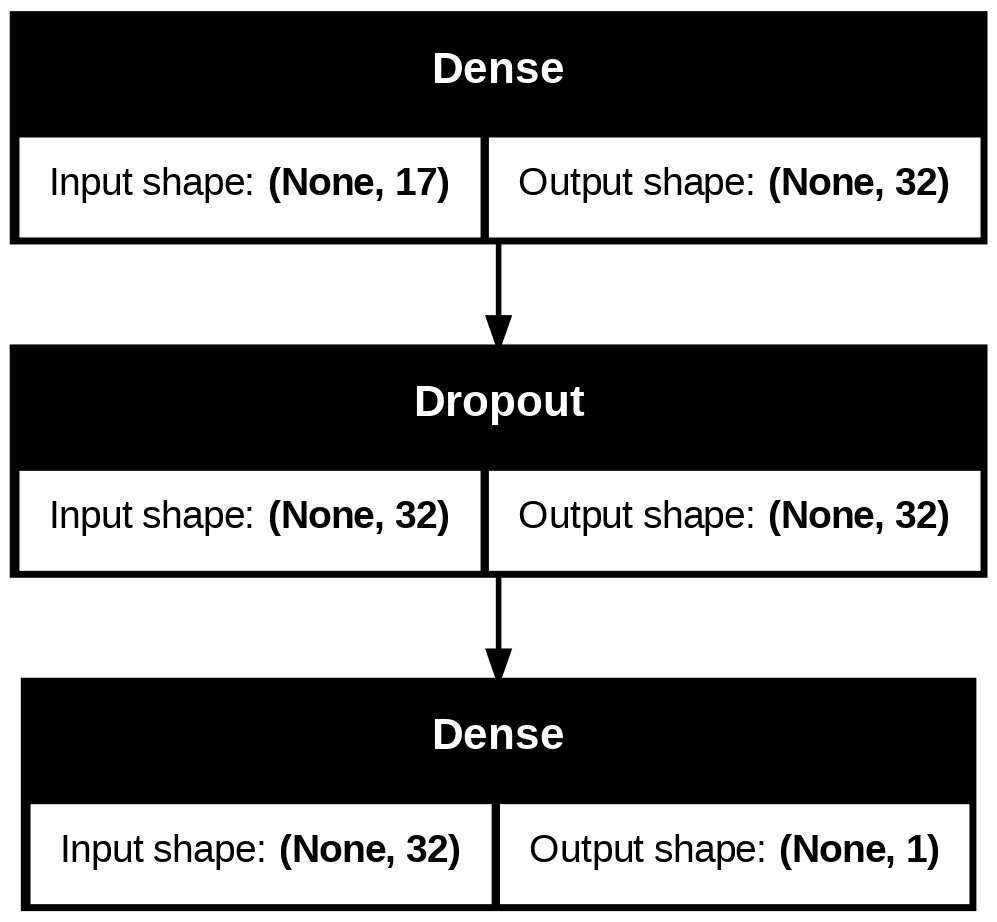

In [29]:
best_model = build_model(best_hps)
keras.utils.plot_model(best_model, show_shapes=True)

In [30]:
best_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 32)                  │             576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 609 (2.38 KB)

 Trainable params: 609 (2.38 KB)

 Non-trainable params: 0 (0.00 B)

A questo punto è possibile unire training set e validation set per addestrare la rete neurale definita con i migliori iperparametri, per poi fare inferenza sul test set e misurare l'accuracy finale.

In [44]:
instances_train_final = pd.concat([instances_train, instances_validation], axis=0)
target_train_final = pd.concat([target_train, target_validation], axis=0)

# Addestramento del modello
history = best_model.fit(instances_train_final, target_train_final, epochs=50, batch_size=32, verbose=1)
# numero di epoche = numero di iterazioni
# batch_size = 32 significa che calcola il gradiente su 32 elementi del training set

test_loss, test_acc = best_model.evaluate(instances_test, target_test)
print(f"Test Accuracy: {test_acc:.10f}")

Epoch 1/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7381 - loss: 0.5275
Epoch 2/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7452 - loss: 0.5253
Epoch 3/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7406 - loss: 0.5209
Epoch 4/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7260 - loss: 0.5345
Epoch 5/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7291 - loss: 0.5338
Epoch 6/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7311 - loss: 0.5361
Epoch 7/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7454 - loss: 0.5250
Epoch 8/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7333 - loss: 0.5295
Epoch 9/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7331 - loss: 0.5250
Epoch 10/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7366 - loss: 0.5322
Epoch 11/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7391 - loss: 0.5226
Epoch 12/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step